# Operations Classes
Make a operations classes to feed in the inputs and process the outputs

In [1]:
class Operation():
    
    def __init__(self,  input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
        
        _default_graph.operations.append(self) ## Append the operations class to global 'default graph'
            
    def compute(self):
        pass           ##Should be overridden by other classes

In [2]:
class Add(Operation):
    
    def __init__(self, x, y):
        super().__init__([x,y])   ##Inherits the init from Operation class and overrides it.
    
    def compute(self, xVariable, yVariable):
        self.inputs = [xVariable, yVariable]
        return (xVariable + yVariable)

In [3]:
class Multiply(Operation):
        
    def __init__(self, x, y):
        super().__init__([x,y])   ##Inherits the init from Operation class and overrides it.
        
    def compute(self, xVariable, yVariable):
        self.inputs = [xVariable, yVariable]
        return (xVariable * yVariable)

In [4]:
class MatMul(Operation):
        
    def __init__(self, x, y):
        super().__init__([x,y])
    
    def compute(self, xVariable, yVariable):
        self.inputs = [xVariable, yVariable]
        return xVariable.dot(yVariable)  ##Assumes that the xVariable is a numpy array 

# Placeholder Class
A placeholder class to basically get the input data and feed it to the neural network. It serves as a template to the incoming data.

In [5]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes = []
        _default_graph.placeholders.append(self) ## Grab global graph variable and append a placeholder to it
        

# Variable Class
It represents the variables that are to be passed on to the other classes

In [6]:
class Variable():
    
    def __init__(self, initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self) ## Grab global graph variable and append vars to it

# Graph Class
It serves as a connector between the placeholders, variables to the appropriate operations classes. It is a global object.

In [7]:
class Graph():
    
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def setDefault(self):
         global _default_graph ## Set the class as global
         
         _default_graph = self

# Post-order function
Make sure that the multiplication happens before addition. Tree-traversal is being used to implement the function.

In [8]:
def traverse_postOrder(operation):
    
    """
    Post-order traversal of nodes. Checks and corrects that the operations 
    follow the order multiplication and then addition ie, (A*x) and then '+ B'
    Where A is the input, x is the weight(random) and B is the bias.
    """
    nodes_postOrder = []
    def fixOrder(node):
            if isinstance(node, Operation):
                for input_node in node.input_nodes:
                    fixOrder(input_node)
            nodes_postOrder.append(node)
            
    fixOrder(operation)
    return nodes_postOrder

# Session
A class that creates a session for the neural network to work. It will work as a kind of an environment for the functioning of the neural network.

In [9]:
class Session():
    
    def run(self, operation, feed_dict={}):    ## Feed a batch of data through the dict
        nodes_postOrder = traverse_postOrder(operation)
        
        for node in nodes_postOrder:
            
            if (type(node) == Placeholder):
                node.output = feed_dict[node]
            
            elif (type(node)) == Variable:
                node.output = node.value
            
            else:
                ##Operations
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
            
            if (type(node.output == list)):
                node.output = np.array(node.output)
                
        return operation.output

# Classification 
## Sigmoid 
I have chosen sigmoid function as the activation function as I think it is the most convenient for a simple application.


In [10]:
import numpy as np

In [11]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        super().__init__([z])
        
    def compute(self, z_value):
        return (1/(1 + np.exp(-z_value)))

In [12]:
from sklearn.datasets import make_blobs

In [13]:
data = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=100)
## This creates a basic bindry classification problem which is perfect for 
## testing this neural network

In [14]:
data

(array([[-0.23761326,  7.01892936],
        [ 0.78873252, -4.75089761],
        [-0.01782641, -4.92843063],
        ..., 
        [-1.64226284,  8.14144997],
        [-0.89709501, -2.98500825],
        [ 1.90101688, -6.42243454]]),
 array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0

In [15]:
data[0]

array([[-0.23761326,  7.01892936],
       [ 0.78873252, -4.75089761],
       [-0.01782641, -4.92843063],
       ..., 
       [-1.64226284,  8.14144997],
       [-0.89709501, -2.98500825],
       [ 1.90101688, -6.42243454]])

In [16]:
import pandas as pd

In [17]:
dataDf = pd.DataFrame(data=(data[0][i] for i in range(0, 1000)), columns=['Features_x', 'Features_y'])

In [18]:
dataDf.head()

,Features_x,Features_y
0,-0.237613,7.018929
1,0.788733,-4.750898
2,-0.017826,-4.928431
3,-1.863968,8.518157
4,-1.010003,6.747583


In [19]:
dataClassDf = pd.DataFrame(data=(data[1][i] for i in range(0, 1000)), columns=['Class'])

In [20]:
dataClassDf.head()

,Class
0,1
1,0
2,0
3,1
4,1


In [21]:
dataDf = pd.concat([dataDf, dataClassDf], axis=1)

In [22]:
dataDf.head()

,Features_x,Features_y,Class
0,-0.237613,7.018929,1
1,0.788733,-4.750898,0
2,-0.017826,-4.928431,0
3,-1.863968,8.518157,1
4,-1.010003,6.747583,1


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
features = data[0]
labels = data[1]

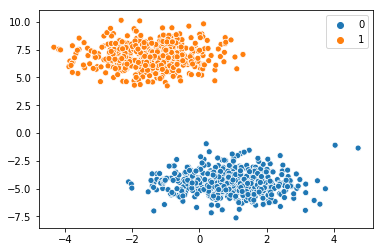

In [25]:
sns.scatterplot(x=features[:,0], y=features[:,1], hue=labels)

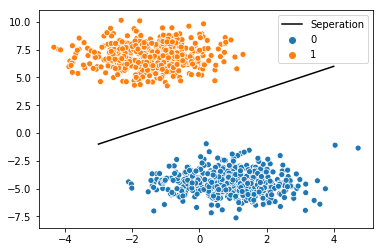

In [26]:
x = np.linspace(-3, 4)
y = x + 2 ## You could try different line parameters as well
sns.scatterplot(x=features[:,0], y=features[:,1], hue=labels)
plt.plot(x, y, 'k', label='Seperation')
plt.legend()

# Example Session

In [27]:
g = Graph()
g.setDefault()

In [28]:
x = Placeholder()
w = Variable([1, -1]) ##The multiplication matrix as discussed above
b = Variable(-2)

In [29]:
z = Add(MatMul(w,x),b)

In [30]:
a = Sigmoid(z)

In [31]:
sess = Session()

In [32]:
pred = np.empty([1000])
for i in range(0, 1000):
    if np.around(sess.run(operation=a, feed_dict={x:[data[0][i][0], data[0][i][1]]})) == 0:
        pred[i] = int(1)
    else :
        pred[i] = int(0)
predInt = pred.astype(int)

In [33]:
predInt

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1,

In [34]:
predDf = pd.DataFrame(data=predInt, columns=['Predictions'])

In [35]:
predDf.head()

,Predictions
0,1
1,0
2,0
3,1
4,1


In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(dataDf['Class'], predDf['Predictions']))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       500
          1       0.99      1.00      1.00       500

avg / total       1.00      1.00      1.00      1000



In [38]:
results = pd.concat([dataDf, predDf], axis=1)

In [39]:
results.head()

,Features_x,Features_y,Class,Predictions
0,-0.237613,7.018929,1,1
1,0.788733,-4.750898,0,0
2,-0.017826,-4.928431,0,0
3,-1.863968,8.518157,1,1
4,-1.010003,6.747583,1,1


In [40]:
results.to_csv('Predictions_ManualNeuralNet', header=True, index_label='Index')